In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#使用pandas模組讀取excel資料;u表示unicode編碼;sheetname=1表示第二張工作表，0表示第一張;skiprows=37表示前37行略過,\s+空白分隔
df = pd.read_table(u'K:\\HALO\\HALO-DB_dataset5844_release1_EMERGE01_20180310_HALOSR_J_V1.ames',skiprows=37,sep="\s+")

#顯示前5行資料
df.head()

,UTC,j(O1D),j(NO2),j(HCHO)_R,j(HCHO)_M,j(H2O2),j(CH3OOH),j(HNO2),j(HNO3),j(HNO4)_1,...,j(CH3COCH3)_1,j(CH3COCH3)_2,j(CH3CHO)_1,j(HCOCHO)_1,j(HCOCHO)_2,j(HCOCHO)_3,j(CH3COO2NO2)_1,j(CH3COO2NO2)_2,j(NO3)_R,j(NO3)_M
0,22984.4,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,...,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0
1,22986.3,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,...,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0
2,22987.6,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,...,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0
3,22988.4,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,...,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0
4,22989.8,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,...,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0,-9900.0


In [3]:
%matplotlib inline 

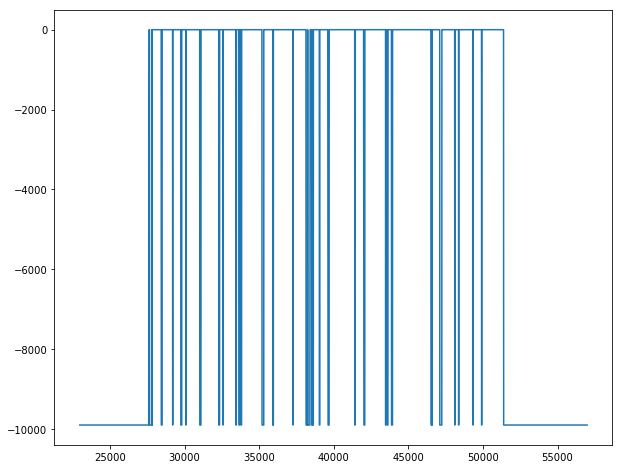

In [4]:
t = df.iloc[:,0]
NO2 = df.iloc[:,2]
HCHO = df.iloc[:,3]

N = len(t)

colors = plt.cm.jet(np.linspace(0,1,N))

fig = plt.figure(figsize=(10,8))
# First subplot
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(t,NO2)

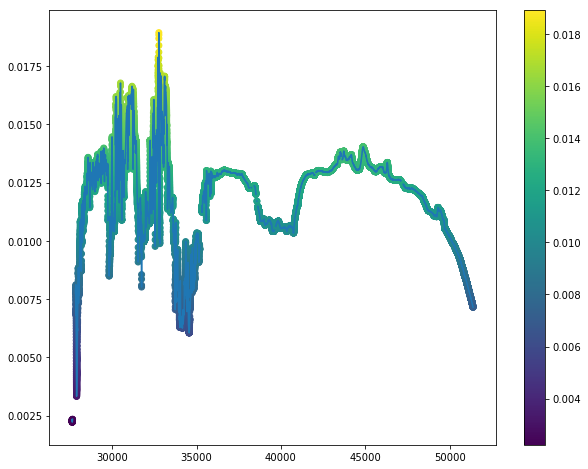

In [5]:
# mark missing values as NaN
t = t.replace(-9900.0, np.NaN)
NO2 = NO2.replace(-9900.0, np.NaN)

fig = plt.figure(figsize=(10,8))
# First subplot
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(t,NO2)
p1 = ax1.scatter(t,NO2,c=NO2)
fig.colorbar(p1)

In [6]:
df1 = df.replace(-9900.0, np.NaN)

In [24]:
df1.columns.values[0]

'UTC'

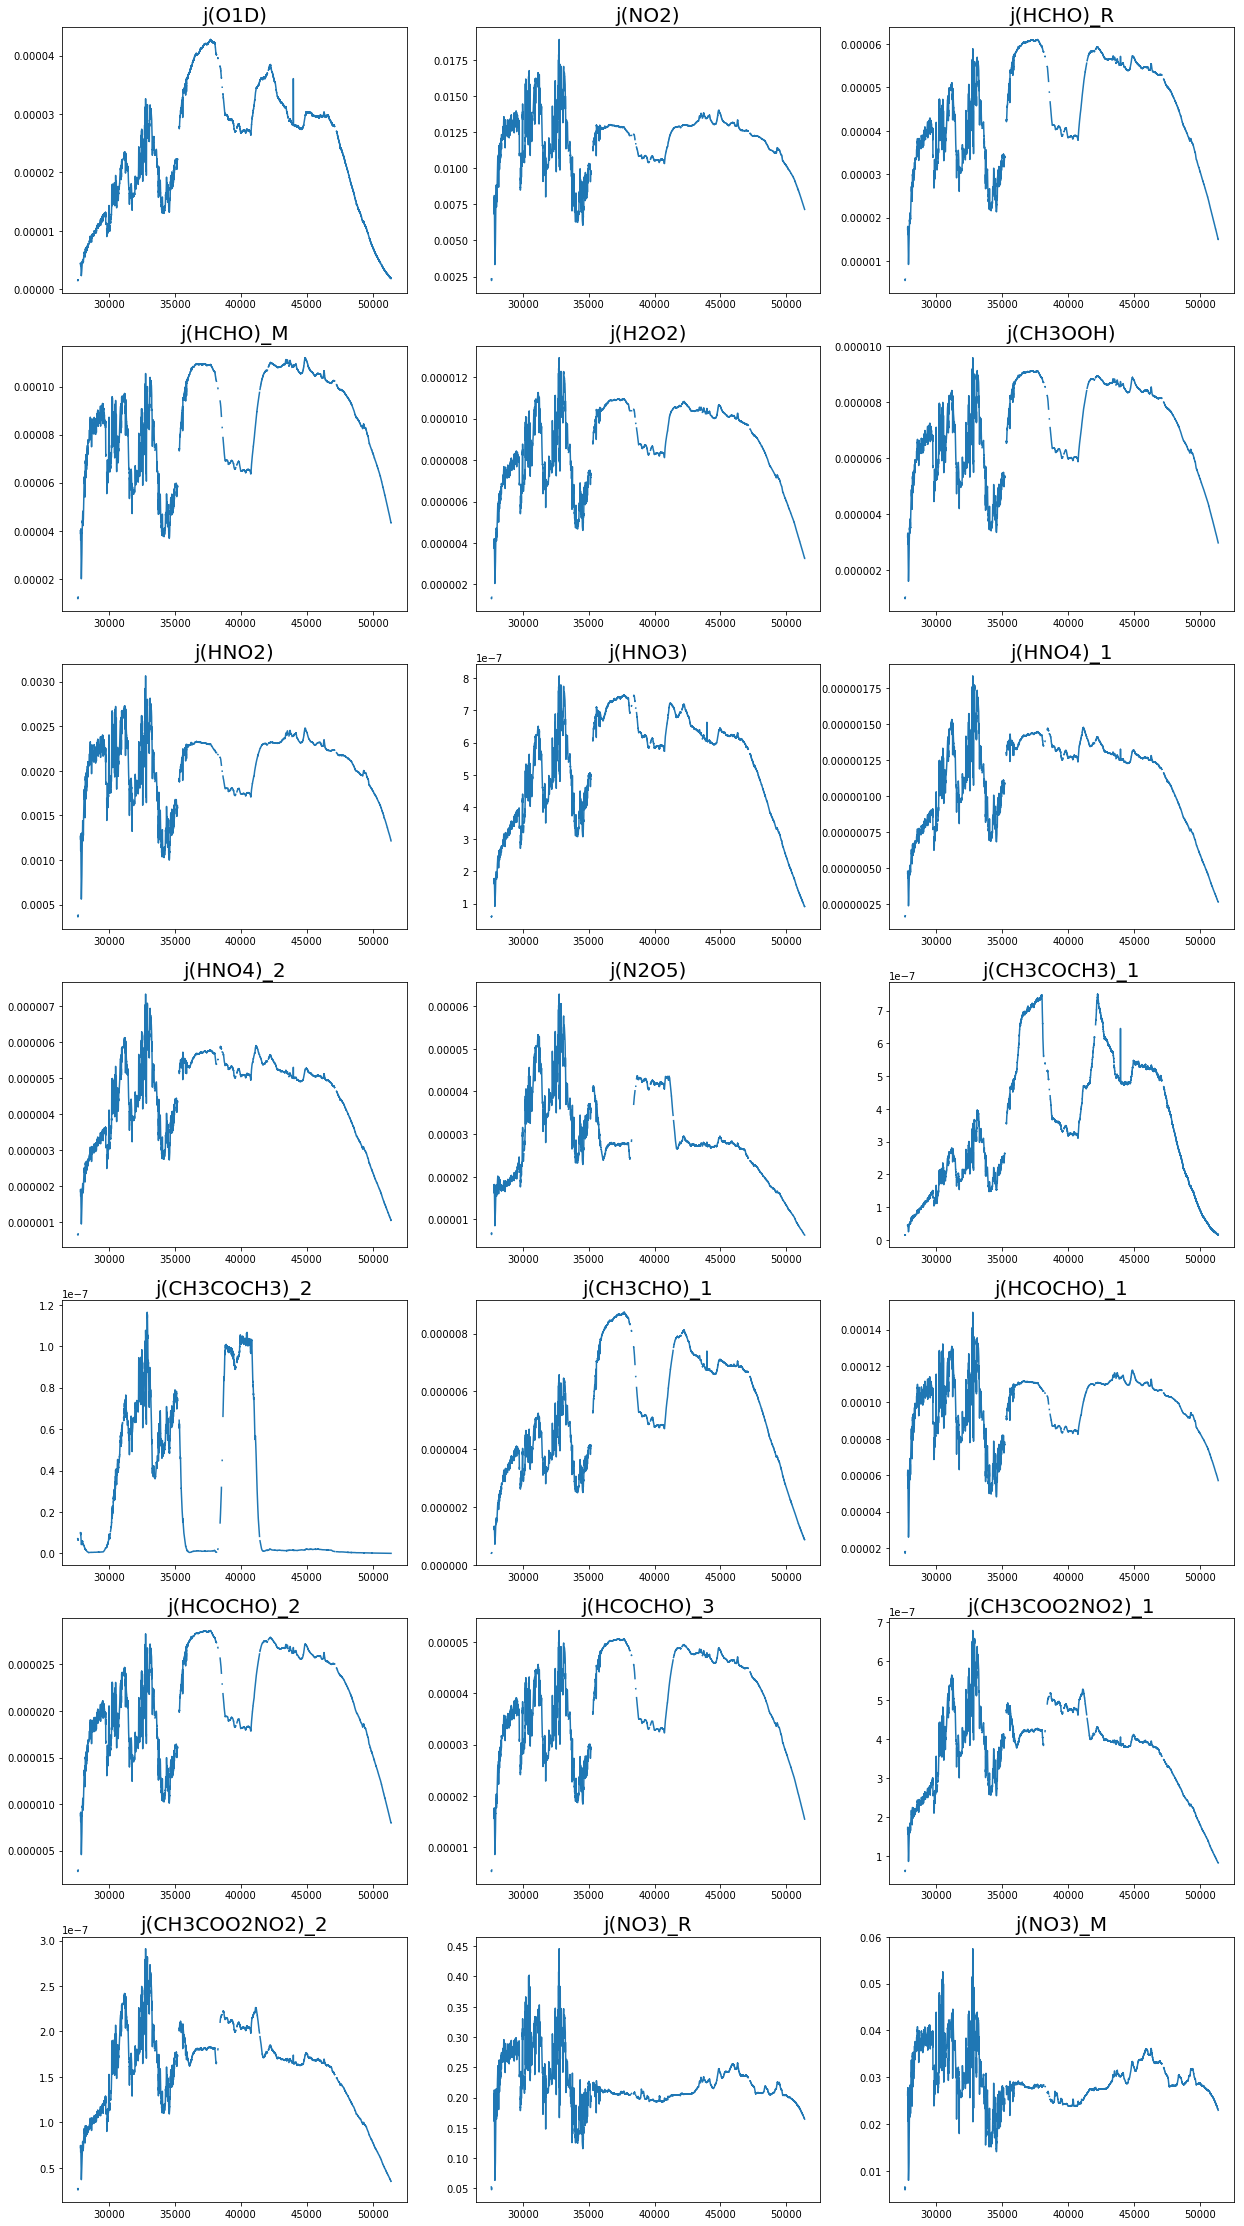

In [46]:
fig = plt.figure(figsize=(21,40))
#plt.title("HALO-DB_dataset5844_release1_EMERGE01_20180310_HALOSR_J_V1", fontsize=20)
# First subplot
t = df1['UTC']
for i in range(21):
    ax1 = fig.add_subplot(7, 3, i+1)
    ax1.plot(t, df1.iloc[:,i+1])
    plt.xscale('linear')
    plt.yscale('linear')
    ax1.tick_params(axis='x', which='major', labelsize=10)
    ax1.tick_params(axis='y', which='major', labelsize=10)
    ax1.set_title(df1.columns.values[i+1], fontsize=20)

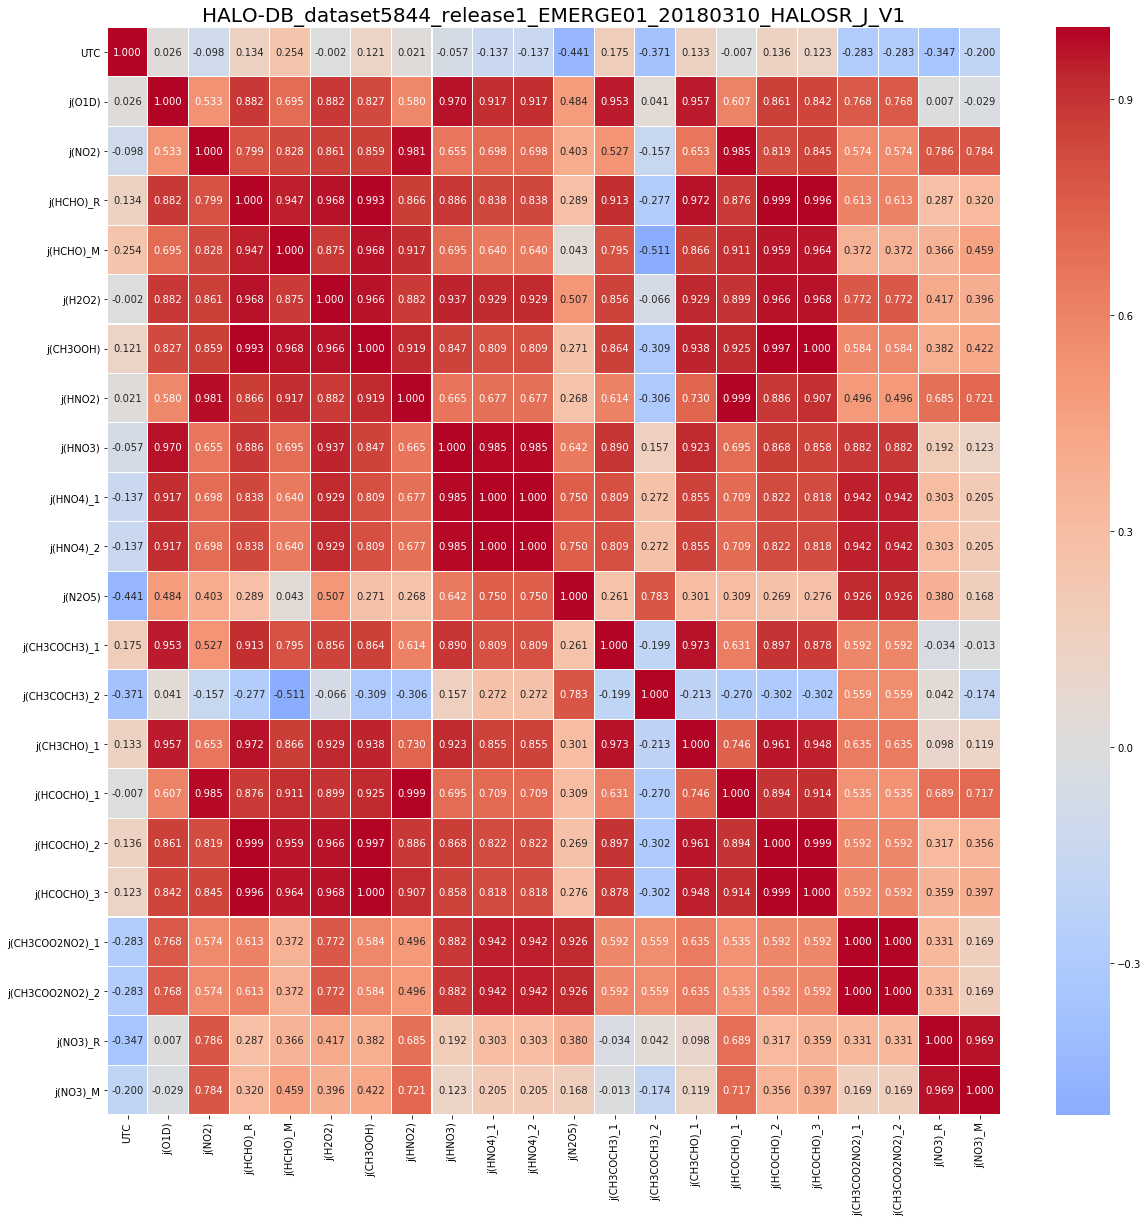

In [43]:
f, ax = plt.subplots(figsize=(20,20 ))
df = df.replace(-9900.0, np.NaN)
corr = df.corr()
corr
#hm = sns.heatmap(corr)
#hm = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,cmap="coolwarm",linewidths=.05,fmt='.3f',center=0)
plt.title("HALO-DB_dataset5844_release1_EMERGE01_20180310_HALOSR_J_V1", fontsize=20)

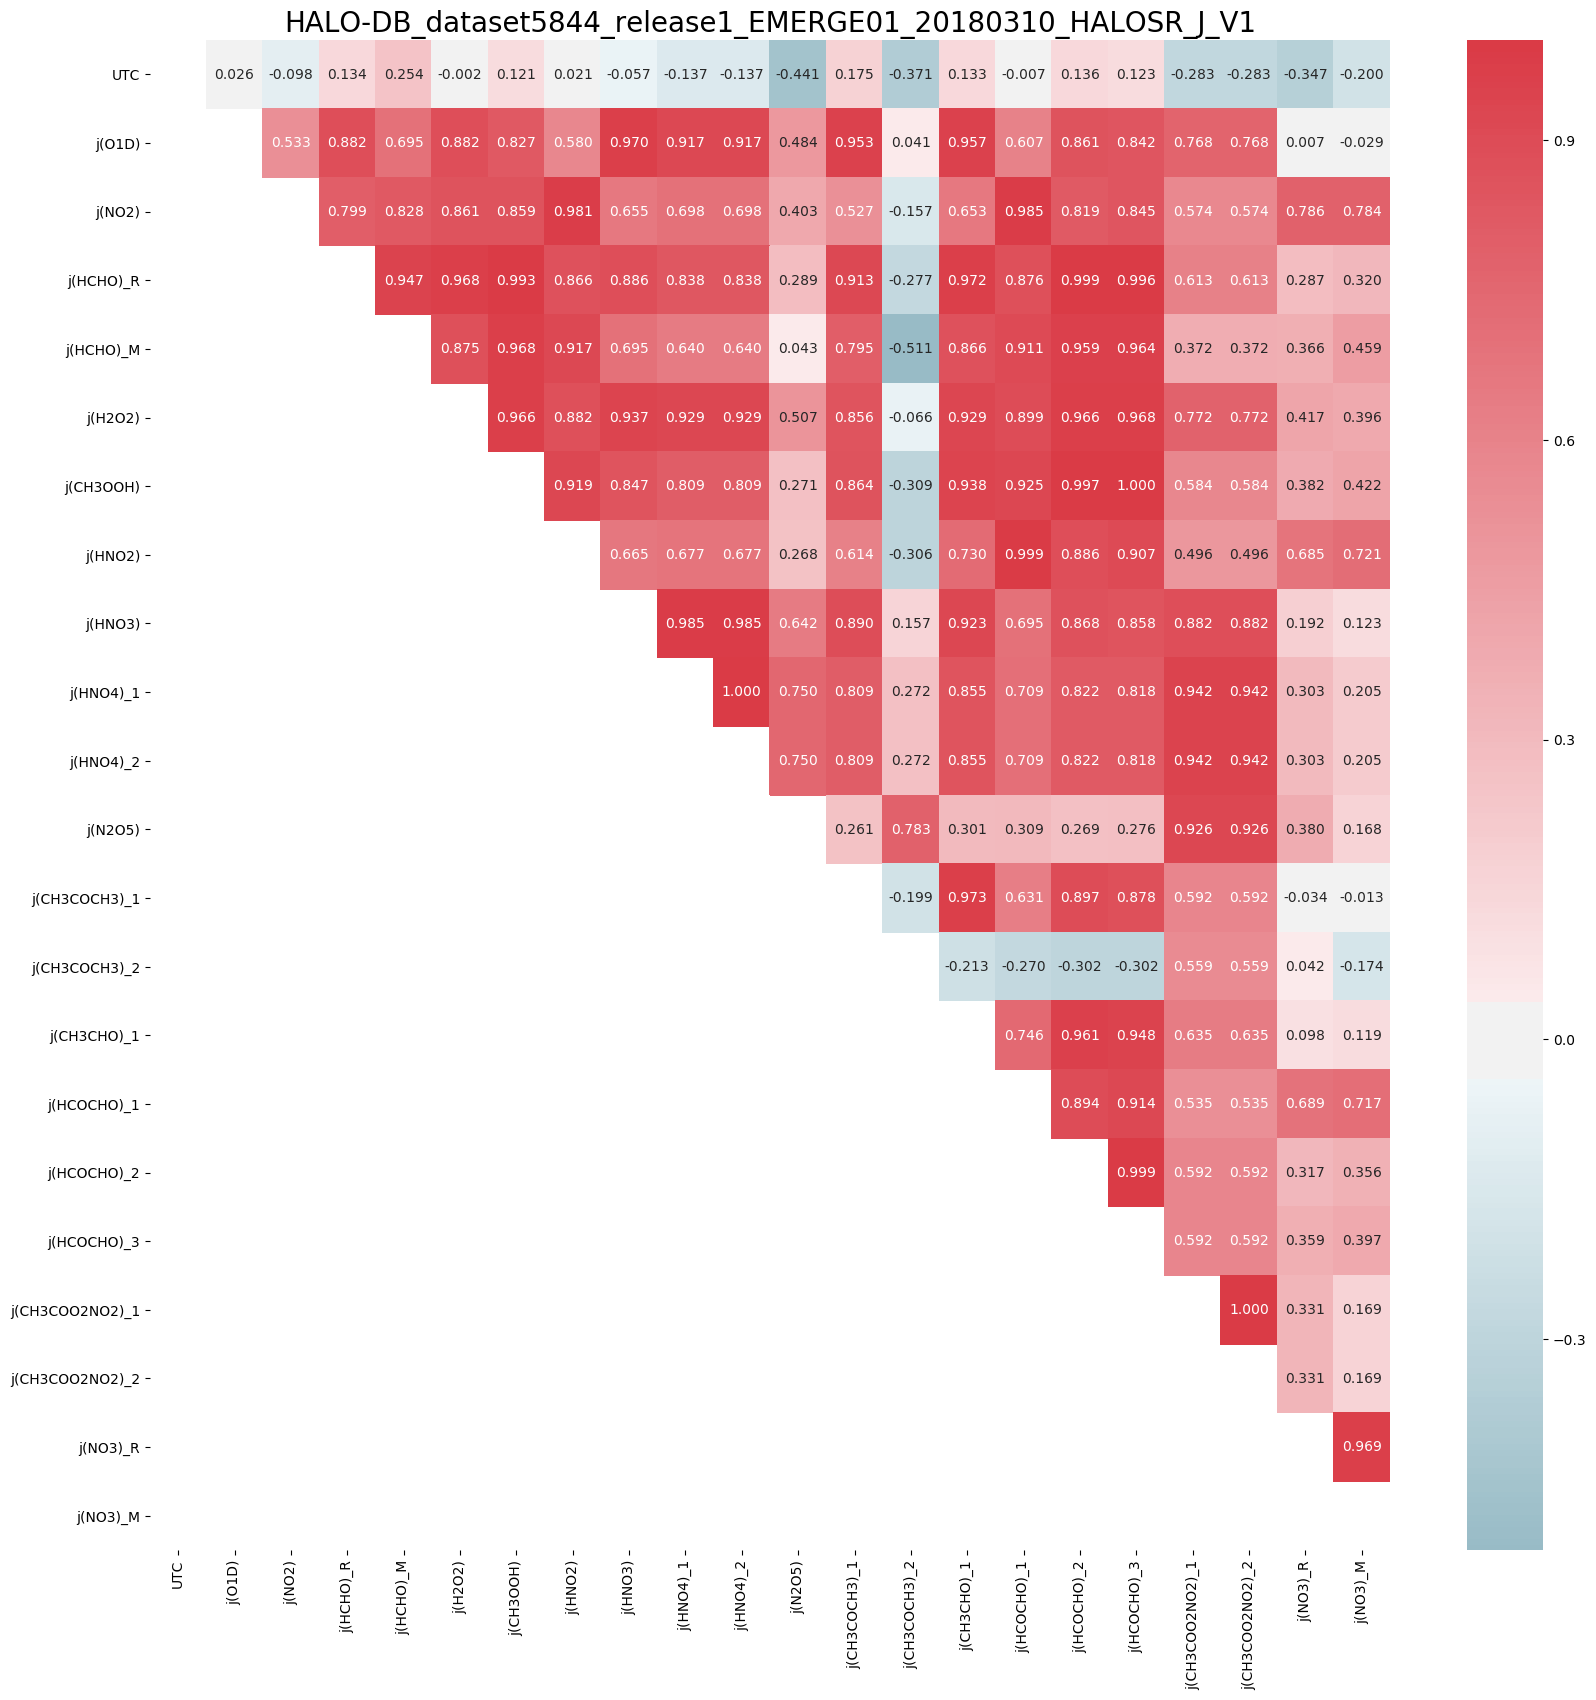

In [9]:
plt.figure(figsize=(20,20),dpi=100)
Var_Corr = df.corr()
corr_mat = np.triu(Var_Corr, k=1)
# Generate a mask for the upper triangle
mask = np.zeros_like(Var_Corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# plot the heatmap and annotation on it
sns.heatmap(corr_mat, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True,cmap=cmap,mask=mask,fmt='.3f',center=0)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.title("HALO-DB_dataset5844_release1_EMERGE01_20180310_HALOSR_J_V1", fontsize=20)

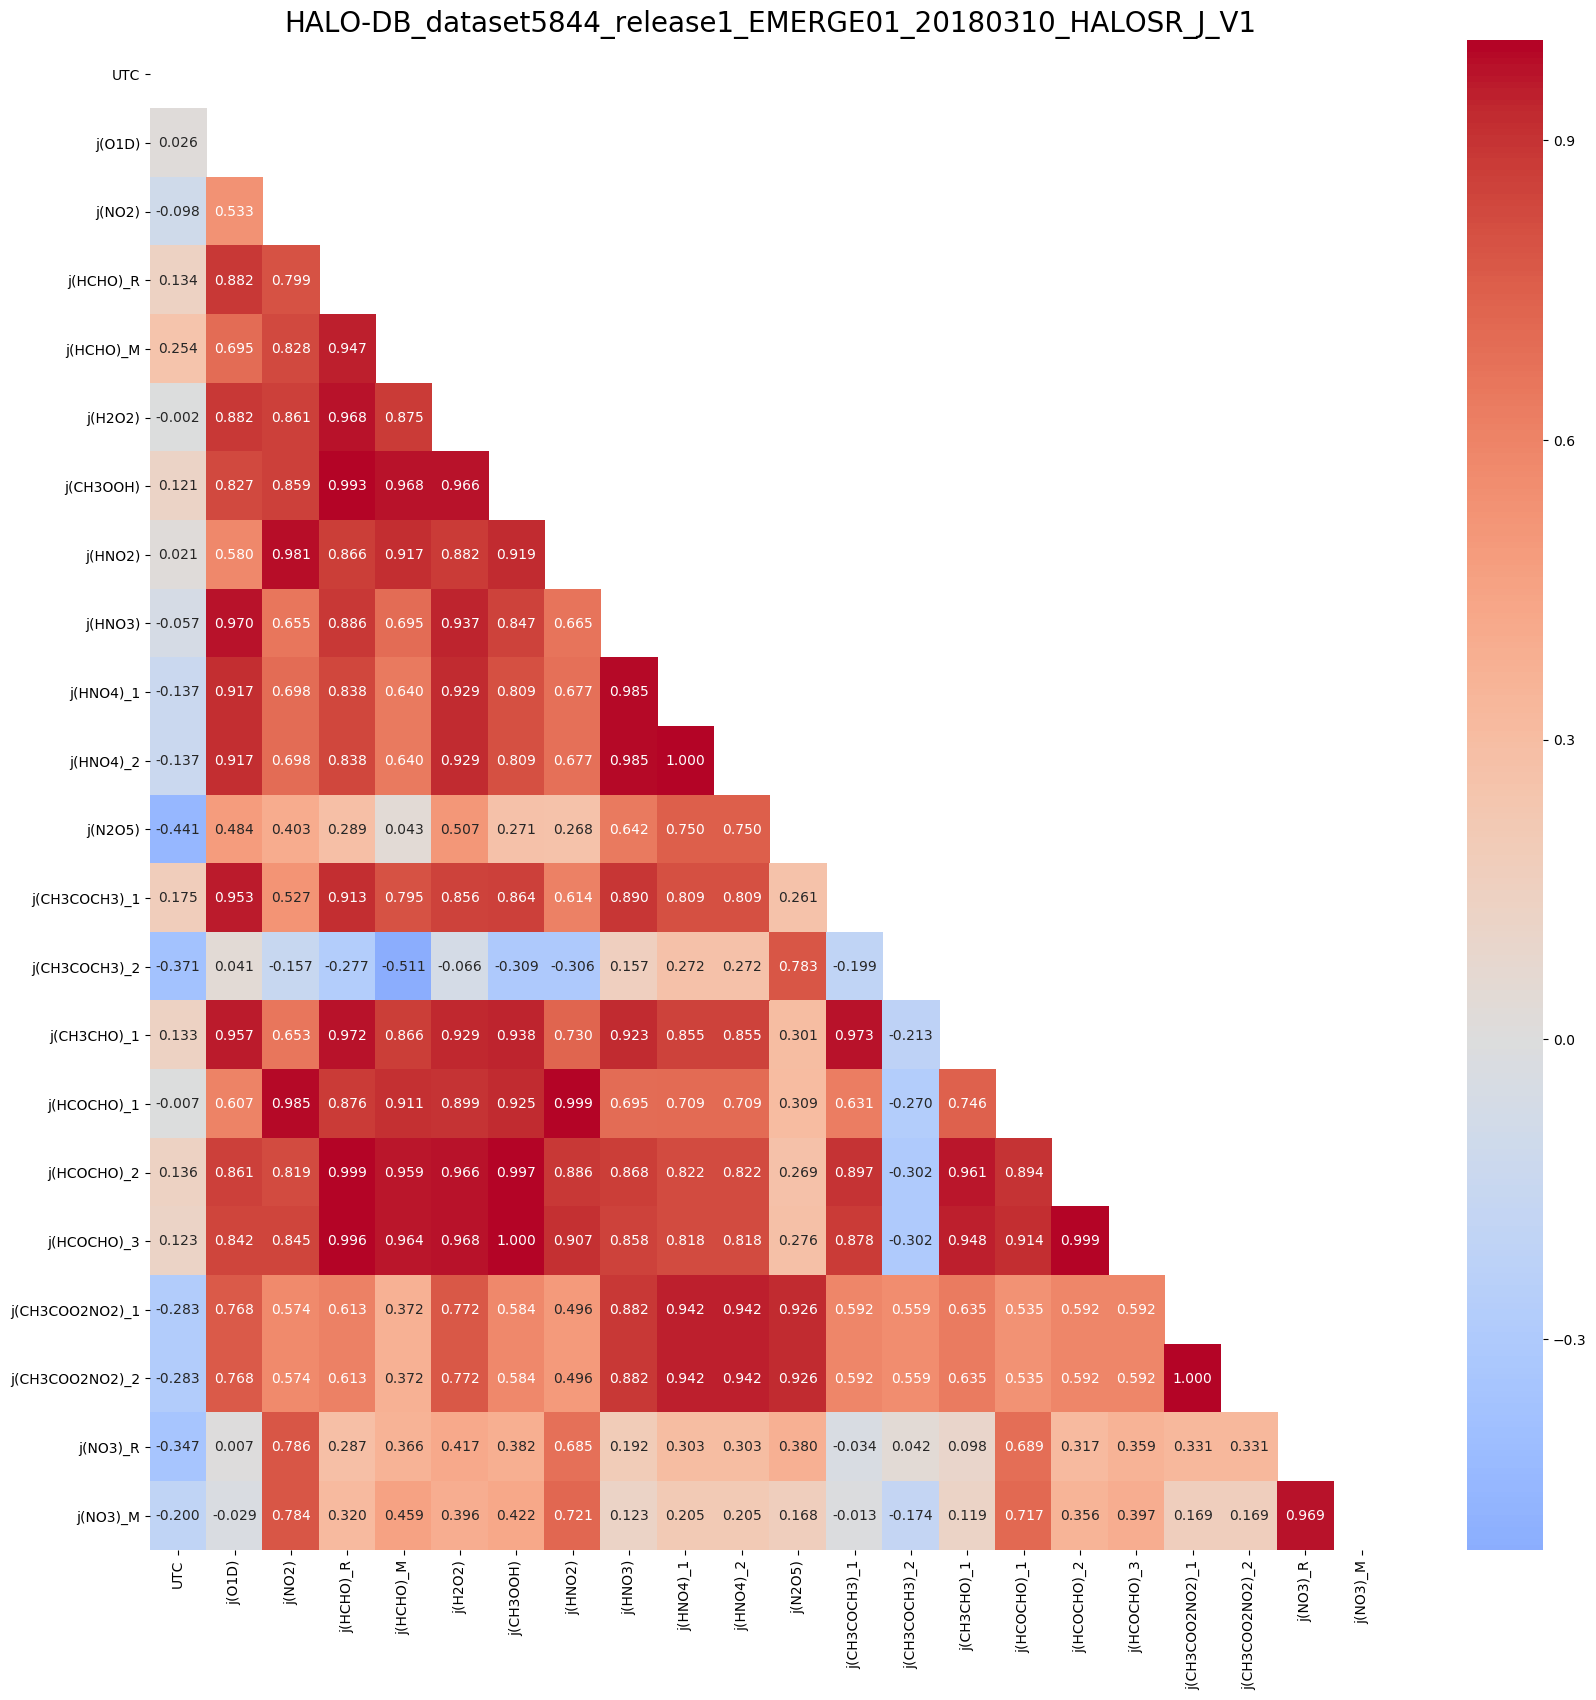

In [10]:
plt.figure(figsize=(20,20),dpi=100)
Var_Corr = df.corr()
corr_mat = np.tril(Var_Corr,k=-1)
# Generate a mask for the upper triangle
mask = np.zeros_like(Var_Corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap and annotation on it
sns.heatmap(corr_mat, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True,cmap="coolwarm",mask=mask,fmt='.3f',center=0)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.title("HALO-DB_dataset5844_release1_EMERGE01_20180310_HALOSR_J_V1", fontsize=20)